# Updating a network to reflect the fact a node has changed membership status.

This isn't going to be fun probably.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy.random as npr
import numpy as np
import seaborn as sns
from matplotlib import animation

In [3]:
sizes = [10,10]
probs = [[0.9,0.025],[0.025,0.9]]
my_sbm = nx.generators.community.stochastic_block_model(sizes, probs)

C:\Users\mfyles\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


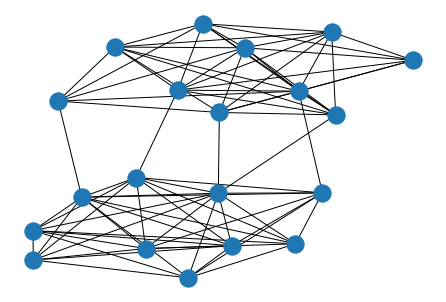

In [4]:
nx.draw_kamada_kawai(my_sbm)

Node 1 decides he wants to join the other group.

In [5]:
my_sbm.nodes[1]

{'block': 0}

In [6]:
list(my_sbm.neighbors(1))

[0, 3, 4, 5, 6, 8, 9, 18]

In [7]:
within_group = 0.9
between_group = 0.025

neighbours = list(my_sbm.neighbors(1))
[my_sbm.remove_edge(1, node) for node in neighbours]

new_block = 1
my_sbm.nodes[1].update({'block': new_block})

for node in my_sbm.nodes():
    if node != 1:
        if my_sbm.nodes[node]["block"] == new_block and npr.binomial(1,within_group) == 1:
                my_sbm.add_edge(1,node)
        elif my_sbm.nodes[node]["block"] != new_block and npr.binomial(1,between_group) == 1:
                my_sbm.add_edge(1,node)

        
list(my_sbm.neighbors(1))


[7, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
def move_node(node_in, network_in):
    within_group = 0.9
    between_group = 0.025
    
    neighbours = list(network_in.neighbors(node_in))
    [network_in.remove_edge(node_in, node) for node in neighbours]
    
    current_block = network_in.nodes[node_in]["block"]
    new_block = 1 - current_block
    
    network_in.nodes[node_in].update({'block': new_block})
    
    for node in network_in.nodes():
        if node != node_in:
            if network_in.nodes[node]["block"] == new_block and npr.binomial(1,within_group) == 1:
                    network_in.add_edge(node_in,node)
            elif network_in.nodes[node]["block"] != new_block and npr.binomial(1,between_group) == 1:
                    network_in.add_edge(node_in,node)

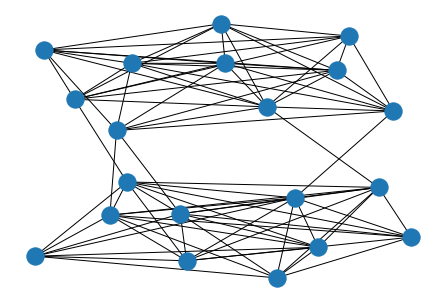

In [9]:
update_node = npr.choice(my_sbm.nodes)
move_node(update_node, my_sbm)
nx.draw_kamada_kawai(my_sbm)

Lets wrap this up nicely in a function and create an animation of it.

In [17]:
def simple_update(num, layout, G, ax):
    ax.clear()
    
    prev_layout = nx.kamada_kawai_layout(G)
    
    #Choose which node to update, then move it
    update_node = npr.choice(G.nodes)
    move_node(update_node, G)
    
    layout = nx.kamada_kawai_layout(G, pos = prev_layout, scale = 0.9)
    nx.draw(G, pos=layout, ax=ax)

    # Set the title
    ax.set_title("Update {}".format(num))
    
def simple_animation():

    # Build plot
    fig, ax = plt.subplots(figsize=(6,4))

    # Create a graph and layout
    layout = nx.kamada_kawai_layout(G)

    ani = animation.FuncAnimation(fig, simple_update, 200, fargs=(layout, G, ax))
    ani.save('animation_1_no_epidemic.gif', writer='imagemagick')

    plt.show()

In [18]:
%%capture
my_sbm = nx.generators.community.stochastic_block_model(sizes, probs)

G = my_sbm

simple_animation()

![SegmentLocal](animation_1_no_epidemic.gif "segment")